In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
%matplotlib inline
import plotly.express as px
from scipy import stats

In [8]:
#df_crimen = pd.read_csv("../CSV_limpios/crimen_for_plots.csv")
#df_aire = pd.read_csv("../CSV_limpios/aire_for_plots.csv")

df_aire = pd.read_csv("../CSV_limpios/aire.csv")
df_crimen = pd.read_csv("../CSV_limpios/crimen.csv")

df_all = pd.DataFrame()
df_all['ID'] = df_aire['ID']
df_all['Dia'] = df_aire['Dia']
df_all['Mes'] = df_aire['Mes']
df_all['Anio'] = df_aire['Anio']
df_all['Alcaldia'] = df_aire['Alcaldia']
df_all['Latitud'] = df_aire['Latitud']
df_all['Longitud'] = df_aire['Longitud']
df_all['Crimenes'] = df_crimen['countCrimenes']
df_all['AQI'] = df_aire['avgAQI']
df_all

ID  Dia  Mes  Anio               Alcaldia    Latitud  \
0        1_1_2016_AZCAP    1    1  2016           AZCAPOTZALCO  19.468405   
1        1_1_2016_BENIT    1    1  2016          BENITO JUAREZ  19.370464   
2        1_1_2016_CUAJI    1    1  2016  CUAJIMALPA DE MORELOS  19.365313   
3        1_1_2016_CUAUH    1    1  2016             CUAUHTEMOC  19.411617   
4        1_1_2016_IZTAC    1    1  2016              IZTACALCO  19.384413   
...                 ...  ...  ...   ...                    ...        ...   
15076  31_12_2020_BENIT   31   12  2020          BENITO JUAREZ  19.370464   
15077  31_12_2020_CUAJI   31   12  2020  CUAJIMALPA DE MORELOS  19.357357   
15078  31_12_2020_GUSTA   31   12  2020       GUSTAVO A MADERO  19.482700   
15079  31_12_2020_IZTAP   31   12  2020             IZTAPALAPA  19.360794   
15080  31_12_2020_VENUS   31   12  2020    VENUSTIANO CARRANZA  19.424610   

        Longitud  Crimenes  AQI  
0     -99.169792         7  206  
1     -99.159599         7  184  
2     -99.291702        10  164  
3     -99.152206        12  178  
4     -99.117638        12  187  
...          ...       ...  ...  
15076 -99.159599         2  117  
15077 -99.262863         2   97  
15078 -99.094521        24  128  
15079 -99.073883        15  127  
15080 -99.119591        14  127  

[15081 rows x 9 columns]

In [33]:
df_all_copy = df_all.copy()

In [34]:
alc_mapper = {"BENITO JUAREZ": 1,
              "VENUSTIANO CARRANZA": 2,
              "IZTACALCO": 3,
              "TLALPAN": 4,
              "CUAJIMALPA DE MORELOS": 5,
              "TLAHUAC": 6,
              "AZCAPOTZALCO": 7,
              "CUAUHTEMOC": 8,
              "MIGUEL HIDALGO": 9,
              "IZTAPALAPA": 10,
              "ALVARO OBREGON": 11,
              "GUSTAVO A MADERO": 12,
              "MILPA ALTA": 13}
df_all_copy['Alcaldia_num'] = df_all_copy['Alcaldia'].replace(alc_mapper)

df_all_copy["r"] = 0
df_all_copy["p value"] = 0
df_all_copy["% / 10 AQI"] = 0

In [37]:
df_all_copy

ID  Dia  Mes  Anio               Alcaldia    Latitud  \
0        1_1_2016_AZCAP    1    1  2016           AZCAPOTZALCO  19.468405   
1        1_1_2016_BENIT    1    1  2016          BENITO JUAREZ  19.370464   
2        1_1_2016_CUAJI    1    1  2016  CUAJIMALPA DE MORELOS  19.365313   
3        1_1_2016_CUAUH    1    1  2016             CUAUHTEMOC  19.411617   
4        1_1_2016_IZTAC    1    1  2016              IZTACALCO  19.384413   
...                 ...  ...  ...   ...                    ...        ...   
15076  31_12_2020_BENIT   31   12  2020          BENITO JUAREZ  19.370464   
15077  31_12_2020_CUAJI   31   12  2020  CUAJIMALPA DE MORELOS  19.357357   
15078  31_12_2020_GUSTA   31   12  2020       GUSTAVO A MADERO  19.482700   
15079  31_12_2020_IZTAP   31   12  2020             IZTAPALAPA  19.360794   
15080  31_12_2020_VENUS   31   12  2020    VENUSTIANO CARRANZA  19.424610   

        Longitud  Crimenes  AQI  Alcaldia_num         r       p value  \
0     -99.169792         7  206             7  0.012733  8.216237e-01   
1     -99.159599         7  184             1  0.045831  3.899507e-01   
2     -99.291702        10  164             5  0.054887  4.053339e-01   
3     -99.152206        12  178             8  0.098765  6.456253e-02   
4     -99.117638        12  187             3  0.139905  1.035521e-02   
...          ...       ...  ...           ...       ...           ...   
15076 -99.159599         2  117             1  0.323071  0.000000e+00   
15077 -99.262863         2   97             5  0.182703  1.566750e-03   
15078 -99.094521        24  128            12  0.155498  2.790020e-02   
15079 -99.073883        15  127            10  0.385221  0.000000e+00   
15080 -99.119591        14  127             2  0.313627  2.000000e-08   

       % / 10 AQI  
0        0.079581  
1        0.315133  
2        0.276030  
3        0.545789  
4        0.740386  
...           ...  
15076    1.870215  
15077    1.245983  
15078    0.971438  
15079    1.979157  
15080    2.009477  

[15081 rows x 13 columns]

In [12]:
for Alcaldia in df_all_copy['Alcaldia_num'].unique():
    for anio in df_all_copy['Anio'].unique():
        for mes in df_all_copy['Mes'].unique():
            df_test = df_all_copy[(df_all_copy['Alcaldia_num'] == Alcaldia) & (df_all_copy['Anio'] == anio) & (df_all_copy['Mes'] == mes)]
            df_test = df_test[["Crimenes", "AQI"]].reset_index(drop = True)

            if(len(df_test.AQI) > 1):
                pearson_coef, p_value = stats.pearsonr(df_test.AQI, df_test.Crimenes)

                df_all_fit = np.polyfit(df_test.AQI, df_test.Crimenes, 1)
                slope = df_all_fit[0]
                percentage = (slope*1000)/df_test["Crimenes"].max()

                r = round(pearson_coef, 6)
                p = round(p_value, 8)

                df_all_copy.loc[(df_all_copy['Alcaldia_num'] == Alcaldia) & (df_all_copy['Anio'] == anio) & (df_all_copy['Mes'] == mes), 'r'] = r
                df_all_copy.loc[(df_all_copy['Alcaldia_num'] == Alcaldia) & (df_all_copy['Anio'] == anio) & (df_all_copy['Mes'] == mes), 'p value'] = p
                df_all_copy.loc[(df_all_copy['Alcaldia_num'] == Alcaldia) & (df_all_copy['Anio'] == anio) & (df_all_copy['Mes'] == mes), "% / 10 AQI"] = percentage

In [19]:
#df_alcaldia = df_all_copy.loc[(df_all_copy['Alcaldia'] == "CUAUHTEMOC") & (df_all_copy['Anio'] == 2019)]
option_slctd = 2019
df_alcaldia = df_all_copy.loc[(df_all_copy['Anio'] == option_slctd)]

#df_group_by = df_alcaldia.groupby(['Anio', 'Mes']).agg(r = ('r', 'mean'), p_value = ('p value', 'mean'), Percentage = ('% / 10 AQI', 'mean')).reset_index()

df_group_by = df_alcaldia.groupby(['Alcaldia', 'Latitud', 'Longitud']).agg(avgAQI=('AQI', 'mean'), sumCrime=('Crimenes', 'sum')).reset_index()
df_group_by
#df_group_by["Anio"] = "2016-2020"
#df_group_by = df_group_by.rename(columns={"Percentage": "% / 10 AQI"})

Alcaldia    Latitud   Longitud      avgAQI  sumCrime
0          ALVARO OBREGON  19.325146 -99.204140   90.764526      7612
1            AZCAPOTZALCO  19.468405 -99.169792  124.931937      2541
2           BENITO JUAREZ  19.370464 -99.159599   86.632911      1815
3   CUAJIMALPA DE MORELOS  19.357357 -99.262863   94.471910      1316
4   CUAJIMALPA DE MORELOS  19.365313 -99.291702   68.222222       130
5              CUAUHTEMOC  19.411617 -99.152206  110.072607      9213
6        GUSTAVO A MADERO  19.482700 -99.094521  112.965625     11439
7               IZTACALCO  19.384413 -99.117638  103.575499      6103
8              IZTAPALAPA  19.360794 -99.073883  111.028369     16293
9          MIGUEL HIDALGO  19.404051 -99.202660  111.345070      2652
10                TLAHUAC  19.246458 -99.010567  114.836795      3392
11                TLALPAN  19.272161 -99.207741   92.931034      5499
12    VENUSTIANO CARRANZA  19.424610 -99.119591  118.256410      6995

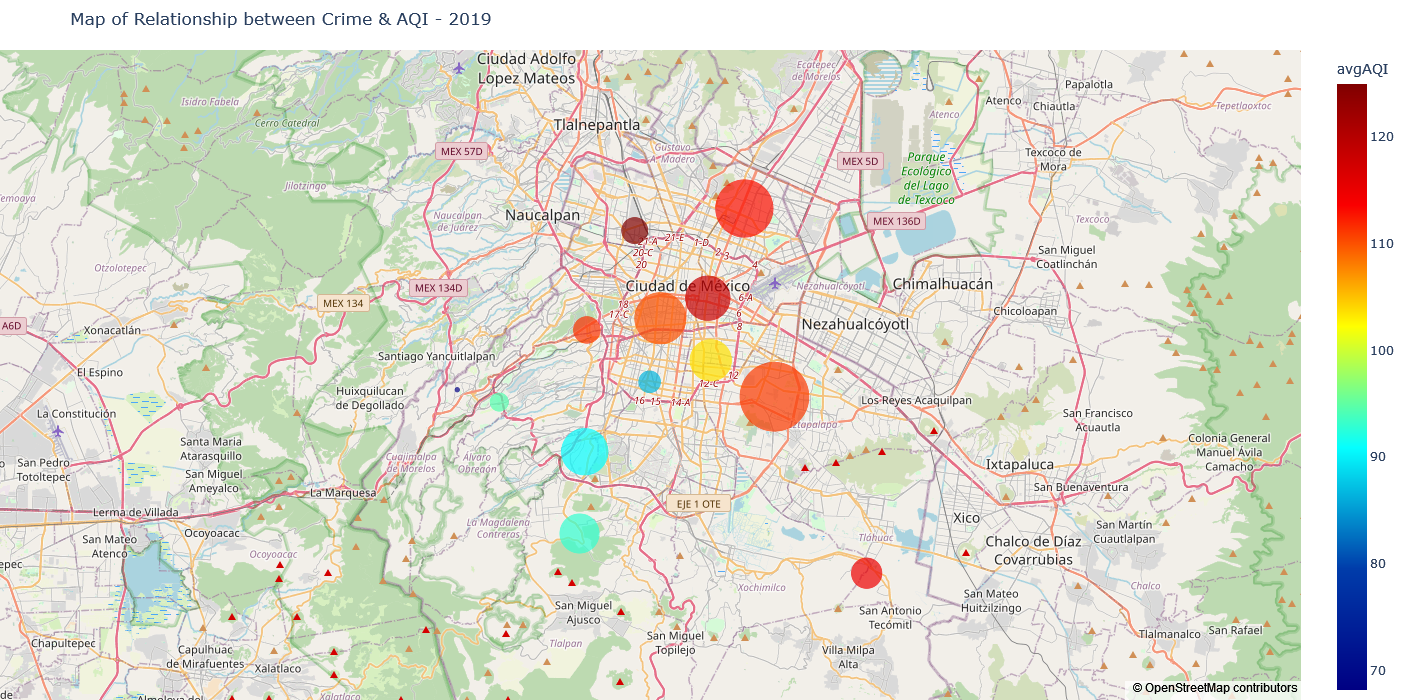

In [20]:
    # Plotly Express
    fig = px.scatter_mapbox(df_group_by, lat="Latitud", lon="Longitud", hover_name="Alcaldia", hover_data=["avgAQI", "sumCrime"], size="sumCrime", size_max=50, color="avgAQI",
                            color_continuous_scale=px.colors.sequential.Jet, zoom=10, height=700)
    fig.update_layout(title="Map of Relationship between Crime & AQI - {}".format(option_slctd))
    fig.update_layout(mapbox_style="open-street-map")
    fig.update_layout(margin={"r": 0, "t": 50, "l": 0, "b": 0})
    # fig.show()

In [29]:
    alcaldia_slct = "CUAUHTEMOC"
    option_slctd = 2019
    df_all_plots = df_all_copy[(df_all_copy['Anio'] == option_slctd) & (df_all_copy['Alcaldia'] == alcaldia_slct) & (df_all_copy['AQI'] > 5)]
    
    df_all_plots = df_all_plots.reset_index(drop=True)
    
    df_all_plots["r"] = round(df_all_plots["r"].mean(), 5)
    df_all_plots["p value"] = round(df_all_plots["p value"].mean(), 5)
    df_all_plots["% / 10 AQI"] = round(df_all_plots["% / 10 AQI"].mean(), 5)

    
    df_all_plots

ID  Dia  Mes  Anio    Alcaldia    Latitud   Longitud  \
0      1_1_2019_CUAUH    1    1  2019  CUAUHTEMOC  19.411617 -99.152206   
1      2_1_2019_CUAUH    2    1  2019  CUAUHTEMOC  19.411617 -99.152206   
2      3_1_2019_CUAUH    3    1  2019  CUAUHTEMOC  19.411617 -99.152206   
3      4_1_2019_CUAUH    4    1  2019  CUAUHTEMOC  19.411617 -99.152206   
4      5_1_2019_CUAUH    5    1  2019  CUAUHTEMOC  19.411617 -99.152206   
..                ...  ...  ...   ...         ...        ...        ...   
298  27_12_2019_CUAUH   27   12  2019  CUAUHTEMOC  19.411617 -99.152206   
299  28_12_2019_CUAUH   28   12  2019  CUAUHTEMOC  19.411617 -99.152206   
300  29_12_2019_CUAUH   29   12  2019  CUAUHTEMOC  19.411617 -99.152206   
301  30_12_2019_CUAUH   30   12  2019  CUAUHTEMOC  19.411617 -99.152206   
302  31_12_2019_CUAUH   31   12  2019  CUAUHTEMOC  19.411617 -99.152206   

     Crimenes  AQI  Alcaldia_num       r  p value  % / 10 AQI  
0          23  152             8  0.0873  0.42365     0.81835  
1          24  141             8  0.0873  0.42365     0.81835  
2          42  125             8  0.0873  0.42365     0.81835  
3          34  147             8  0.0873  0.42365     0.81835  
4          42  157             8  0.0873  0.42365     0.81835  
..        ...  ...           ...     ...      ...         ...  
298        29  147             8  0.0873  0.42365     0.81835  
299        30   97             8  0.0873  0.42365     0.81835  
300        18   89             8  0.0873  0.42365     0.81835  
301        19   81             8  0.0873  0.42365     0.81835  
302        10  100             8  0.0873  0.42365     0.81835  

[303 rows x 13 columns]

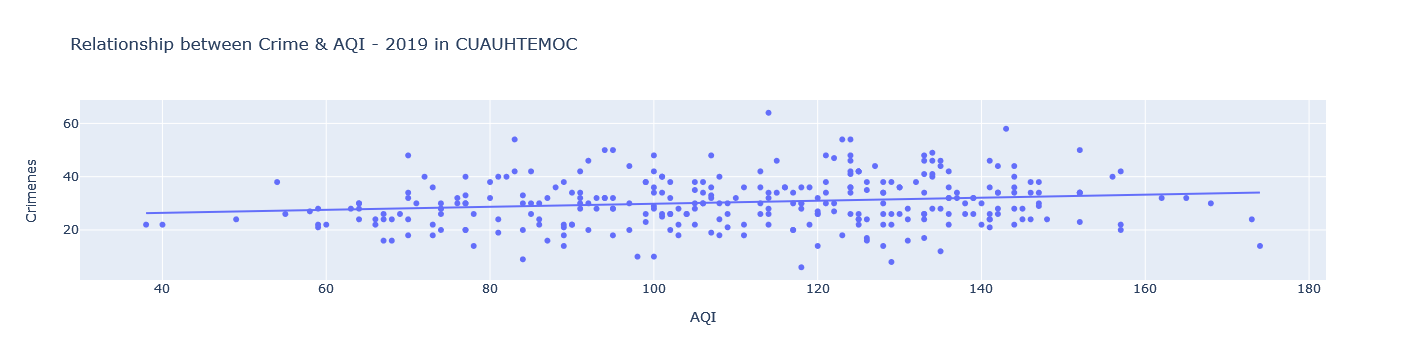

In [31]:
    figure = px.scatter(data_frame = df_all_plots, x="AQI",
                    y="Crimenes", 
                    trendline="ols", 
                    title="Relationship between Crime & AQI - {} in {}".format(option_slctd, alcaldia_slct),
                    hover_data=["r", "p value", "% / 10 AQI", "ID"])
    figure.show()

In [40]:

    for Alcaldia in df_all_copy['Alcaldia_num'].unique():
        for anio in df_all_copy['Anio'].unique():
            df_test = df_all_copy[(df_all_copy['Alcaldia_num'] == Alcaldia) & (df_all_copy['Anio'] == anio)]
            df_test = df_test[["Crimenes", "AQI"]].reset_index(drop = True)

            if(len(df_test.AQI) > 1):
                pearson_coef, p_value = stats.pearsonr(df_test.AQI, df_test.Crimenes)

                df_all_fit = np.polyfit(df_test.AQI, df_test.Crimenes, 1)
                slope = df_all_fit[0]
                percentage = (slope*1000)/df_test["Crimenes"].max()

                r = round(pearson_coef, 5)
                p = round(p_value, 5)

                df_all_copy.loc[(df_all_copy['Alcaldia_num'] == Alcaldia) & (df_all_copy['Anio'] == anio), 'r'] = r
                df_all_copy.loc[(df_all_copy['Alcaldia_num'] == Alcaldia) & (df_all_copy['Anio'] == anio), 'p value'] = p
                df_all_copy.loc[(df_all_copy['Alcaldia_num'] == Alcaldia) & (df_all_copy['Anio'] == anio), "% / 10 AQI"] = round(percentage,5)

In [41]:
    alcaldia_slct = "CUAUHTEMOC"
    option_slctd = 2019
    df_all_plots = df_all_copy[(df_all_copy['Anio'] == option_slctd) & (df_all_copy['Alcaldia'] == alcaldia_slct) & (df_all_copy['AQI'] > 5)]
    
    df_all_plots = df_all_plots.reset_index(drop=True)
    
    #df_all_plots["r"] = round(df_all_plots["r"].mean(), 5)
    #df_all_plots["p value"] = round(df_all_plots["p value"].mean(), 5)
    #df_all_plots["% / 10 AQI"] = round(df_all_plots["% / 10 AQI"].mean(), 5)

    
    df_all_plots

ID  Dia  Mes  Anio    Alcaldia    Latitud   Longitud  \
0      1_1_2019_CUAUH    1    1  2019  CUAUHTEMOC  19.411617 -99.152206   
1      2_1_2019_CUAUH    2    1  2019  CUAUHTEMOC  19.411617 -99.152206   
2      3_1_2019_CUAUH    3    1  2019  CUAUHTEMOC  19.411617 -99.152206   
3      4_1_2019_CUAUH    4    1  2019  CUAUHTEMOC  19.411617 -99.152206   
4      5_1_2019_CUAUH    5    1  2019  CUAUHTEMOC  19.411617 -99.152206   
..                ...  ...  ...   ...         ...        ...        ...   
298  27_12_2019_CUAUH   27   12  2019  CUAUHTEMOC  19.411617 -99.152206   
299  28_12_2019_CUAUH   28   12  2019  CUAUHTEMOC  19.411617 -99.152206   
300  29_12_2019_CUAUH   29   12  2019  CUAUHTEMOC  19.411617 -99.152206   
301  30_12_2019_CUAUH   30   12  2019  CUAUHTEMOC  19.411617 -99.152206   
302  31_12_2019_CUAUH   31   12  2019  CUAUHTEMOC  19.411617 -99.152206   

     Crimenes  AQI  Alcaldia_num        r  p value  % / 10 AQI  
0          23  152             8  0.16521  0.00393     0.88932  
1          24  141             8  0.16521  0.00393     0.88932  
2          42  125             8  0.16521  0.00393     0.88932  
3          34  147             8  0.16521  0.00393     0.88932  
4          42  157             8  0.16521  0.00393     0.88932  
..        ...  ...           ...      ...      ...         ...  
298        29  147             8  0.16521  0.00393     0.88932  
299        30   97             8  0.16521  0.00393     0.88932  
300        18   89             8  0.16521  0.00393     0.88932  
301        19   81             8  0.16521  0.00393     0.88932  
302        10  100             8  0.16521  0.00393     0.88932  

[303 rows x 13 columns]

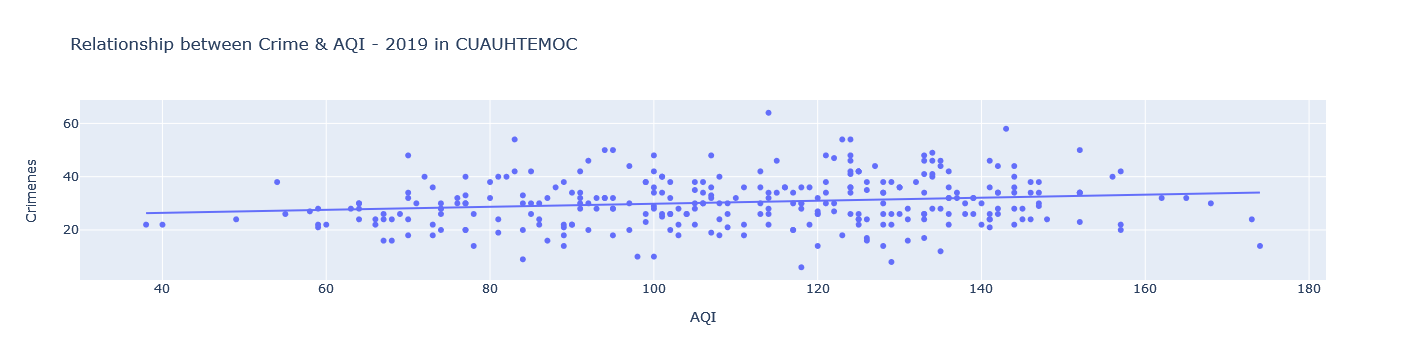

In [42]:
    figure = px.scatter(data_frame = df_all_plots, x="AQI",
                    y="Crimenes", 
                    trendline="ols", 
                    title="Relationship between Crime & AQI - {} in {}".format(option_slctd, alcaldia_slct),
                    hover_data=["r", "p value", "% / 10 AQI", "ID"])
    figure.show()